# Mid-long term forecast

As such, Electricity Price Forecasting (EPF) has become a problem of increasing complexity due to various factors such as the transformation of the energy sector and geopolitical challenges in the power industry. The mid and long term forecast is quite a challenging but also beneficial for the stakeholders problem. However, the complexity along with the variation of the indicators used in short term forecast, are bottleneckfor an accurate forecast. In the current mid term approach, the original dataset has been tranformed, in order to capture the monthly trend in terms of load, while the stock market prices, have been shifted weekly. Actually, the whole input x, at time t targets to y, at time t+168, which is a weekly period.  This happened due to the poor performance of the short term models. The initial approach was to shift towards the past, future prices, in order to connect input x with output y+t. However, due to the aforementioned limitations, the results were even more worse. So, in that way we are trying to capture the overall trend of the electricity price and how the various exogenous factors can affect the market, such as increase in ttf. 
The different algorithms have been trained and evaluated with the same method as short term forecasters.

For the long term forecast, two algorithms have been deployed, ARIMA with various variants and Ridge autoregressor, with and without exogenous factors included. The way that these models are tested is altered compared to the previous approaches. In more details, we followed a walk-forward validation. Initially, following the method 1 or 2, used before the dataset is splitted. Next, reccursively test using the training dataset, which updates at each next time step. At each step t, after the training step, the last actual test point, is included in the training dataset. This allows the simulation of how the model would perform in a real-world scenario where new data is continuously becoming available. 
Additionally, they were trained including exogenous factors, such as the loads and the stock prices from the original dataset. However, due to their computational expense they weren't evaluated for the whole dataset, but their performance over a specific period of time: step, is plotted. Especially, ARIMA with exogenous factors required almost 2 minutes for only one training step-1 hour.

Additionally, it is noteworthy that ARIMA was tested in an hourly dataset, which means that for each hour of the day, a different ARIMA model was trained.





# Orders of the various arima models

model arima with/without exogenous

order 8,0,1  

model arima hourly without exogenous

order_p/hour [4, 4, 4, 3, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 3, 2, 6, 6, 4, 4, 6]

order_q/hour [1, 1, 3, 1, 1, 3, 4, 4, 5, 6, 3, 5, 5, 6, 3, 3, 6, 4, 2, 0, 1, 1, 2, 3]

In [1]:
%%capture
%load_ext autoreload
%autoreload all
from helper_mid import *
from time_analysis import *
%autoreload
%aimport helper_mid
from __init__ import root_dir, data_path

2023-04-25 23:33:31.211590: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 23:33:31.280349: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-25 23:33:31.281177: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 23:33:32.531030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import os

In [4]:
df_clean = pd.read_csv(os.path.join(data_path,'clean', 'clean.csv'), parse_dates=['Timestamp'])
datam=load_data(df_clean)
data_m=split(datam)
data_m=data_m[144:-284]# the dataset for mid term forecasting
df_lagged=data_m.copy()
df_clean

Timestamp  DK_1_imports  SE_4_imports  DK_1_exports  \
0     2018-01-02 00:00:00         383.0           0.0           0.0   
1     2018-01-02 01:00:00         589.0           0.0           0.0   
2     2018-01-02 02:00:00         557.0           0.0           0.0   
3     2018-01-02 03:00:00         487.0           0.0           0.0   
4     2018-01-02 04:00:00         580.0           0.0           0.0   
...                   ...           ...           ...           ...   
46308 2023-04-15 16:00:00           0.0         991.0         600.0   
46309 2023-04-15 17:00:00           0.0        1098.0         600.0   
46310 2023-04-15 18:00:00           0.0        1090.0         600.0   
46311 2023-04-15 19:00:00           0.0        1119.0         600.0   
46312 2023-04-15 20:00:00           0.0        1116.0         600.0   

       SE_4_exports  Day_Ahead_price  Forecasted_Load  Actual_Load  \
0             808.0            18.12           1258.0       1245.0   
1            1019.0            14.99           1188.0       1203.0   
2             926.0            17.79           1167.0       1178.0   
3             784.0            24.51           1187.0       1180.0   
4             756.0            17.82           1235.0       1247.0   
...             ...              ...              ...          ...   
46308           0.0            45.79           1560.0       1557.0   
46309           0.0            51.78           1612.0       1593.0   
46310           0.0            54.53           1538.0       1534.0   
46311           0.0            52.31           1475.0       1482.0   
46312           0.0            50.01           1438.0       1438.0   

       Solar_[MW]  ttf_price  ...  Year  Quarter  Month        Date  Day  \
0             0.0  19.320000  ...  2018        1      1  2018-01-02    2   
1             0.0  19.320000  ...  2018        1      1  2018-01-02    2   
2             0.0  19.320000  ...  2018        1      1  2018-01-02    2   
3             0.0  19.320000  ...  2018        1      1  2018-01-02    2   
4             0.0  19.320000  ...  2018        1      1  2018-01-02    2   
...           ...        ...  ...   ...      ...    ...         ...  ...   
46308       169.0  41.148998  ...  2023        2      4  2023-04-15   15   
46309        87.0  41.148998  ...  2023        2      4  2023-04-15   15   
46310        21.0  41.148998  ...  2023        2      4  2023-04-15   15   
46311         1.0  41.148998  ...  2023        2      4  2023-04-15   15   
46312         0.0  41.148998  ...  2023        2      4  2023-04-15   15   

       Weekday  Hour  Week  business Wind Total  
0            1     0     1      True      429.0  
1            1     1     1      True      375.0  
2            1     2     1      True      313.0  
3            1     3     1      True      229.0  
4            1     4     1      True      175.0  
...        ...   ...   ...       ...        ...  
46308        5    16    15     False     1141.0  
46309        5    17    15     False     1106.0  
46310        5    18    15     False     1046.0  
46311        5    19    15     False      995.0  
46312        5    20    15     False      991.0  

[46313 rows x 26 columns]

In [5]:
data_m.isna().sum()

Timestamp                 0
Day_Ahead_price           0
ttf_price                 0
coal_price                0
co2_price                 0
Hour                      0
Date                      0
Weekday                   0
business                  0
DK_1_imports_mean4        0
SE_4_imports_mean4        0
DK_1_exports_mean4        0
SE_4_exports_mean4        0
Actual_Load_mean4         0
Solar_[MW]_mean4          0
DE_LU_AT_imports_mean4    0
DE_LU_AT_exports_mean4    0
Wind Total_mean4          0
dtype: int64

In [6]:
# setting up splits for training
train_start = pd.to_datetime(['2018-01-09', '2021-01-01', '2021-08-01'], format = '%Y-%m-%d')
k_folds = len(train_start)

# Data-transformation for mid term

In [7]:
# setting up features and target
cols_std = ['ttf_price', 'coal_price', 'co2_price','DK_1_imports_mean4',
       'SE_4_imports_mean4', 'DK_1_exports_mean4', 'SE_4_exports_mean4',
       'Actual_Load_mean4', 'Solar_[MW]_mean4', 'DE_LU_AT_imports_mean4',
       'DE_LU_AT_exports_mean4', 'Wind Total_mean4'] 
features = cols_std + ['Weekday', 'Hour']
target = 'Day_Ahead_price'

# Models

## Split - Method = 0
The approach is to train and test in consecutive/sequential blocks, devoting 85% to training and 15% to test.

In [121]:
split_method = 0

### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


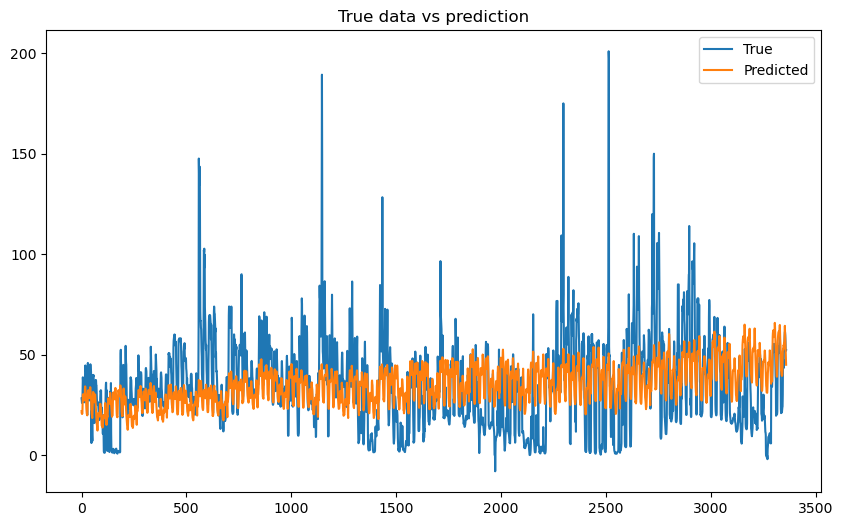

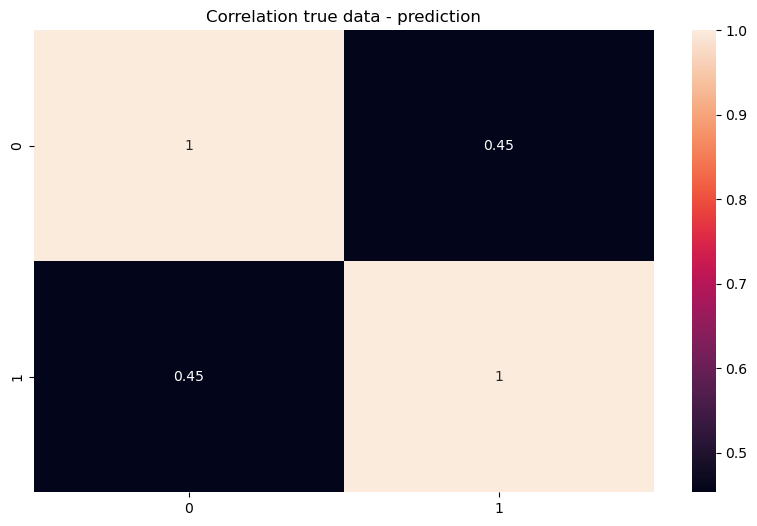

	r^2=0.204786
Mean Absolute Error (MAE): 14.800410381305284
Mean Squared Error (MSE): 382.68303984399495
Root Mean Squared Error (RMSE): 19.56228616097809
Mean Absolute Percentage Error (MAPE): 228.42
Accuracy: -128.42
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


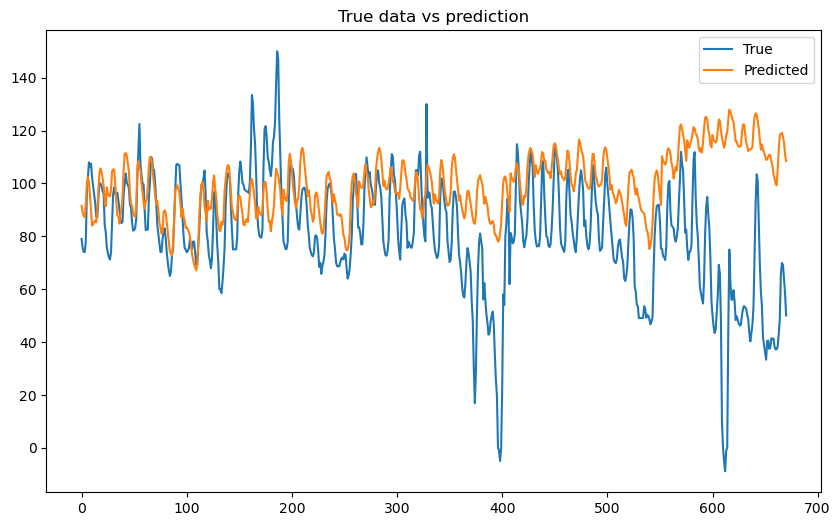

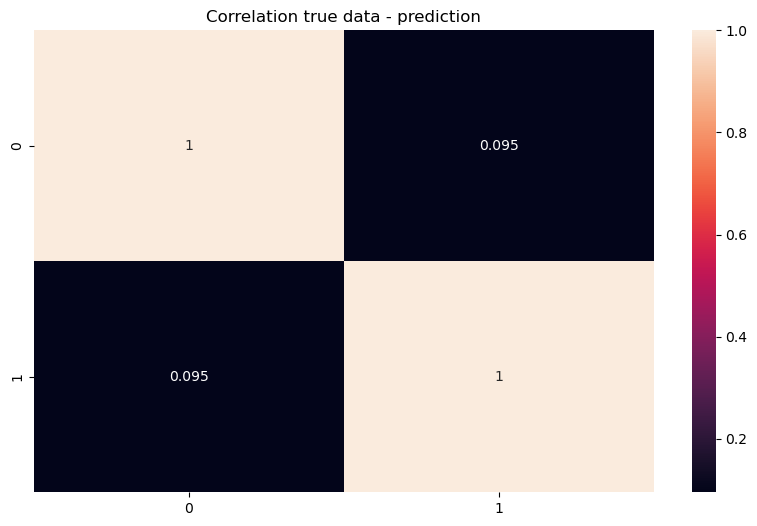

	r^2=-0.903293
Mean Absolute Error (MAE): 22.403308485114504
Mean Squared Error (MSE): 935.3936197901459
Root Mean Squared Error (RMSE): 30.58420539739664
Mean Absolute Percentage Error (MAPE): 1893.37
Accuracy: -1793.37
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


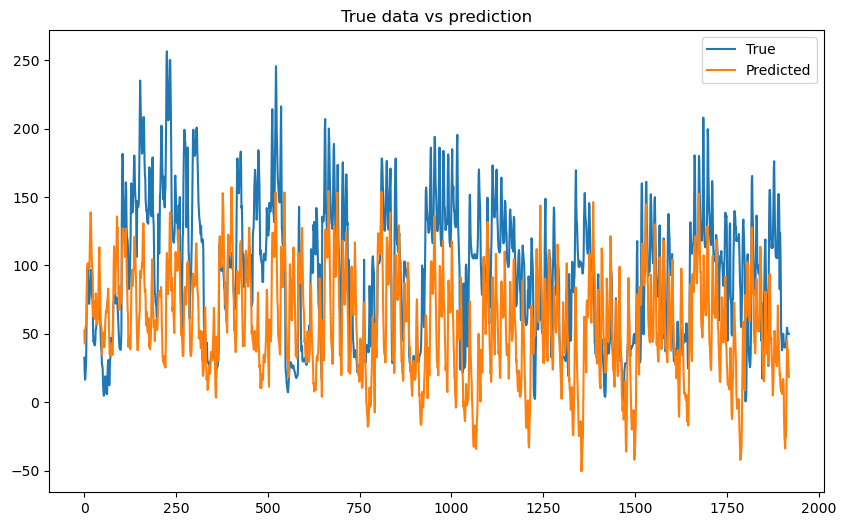

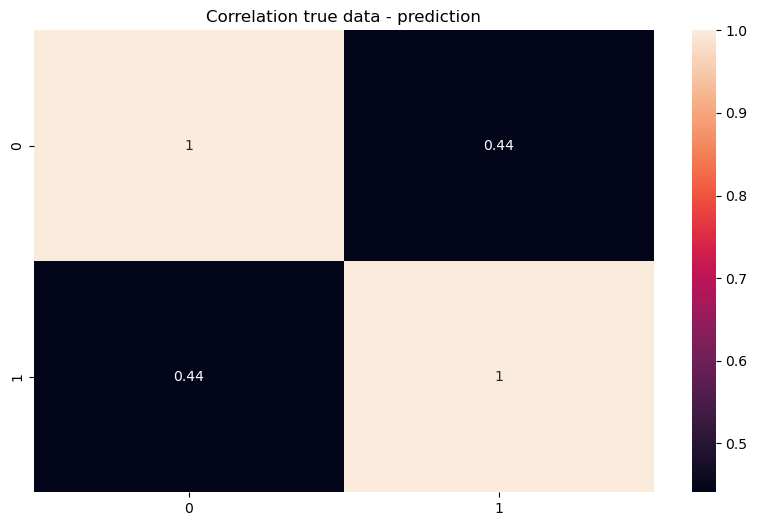

	r^2=-0.509662
Mean Absolute Error (MAE): 49.54584579228046
Mean Squared Error (MSE): 3706.957290187103
Root Mean Squared Error (RMSE): 60.88478701767054
Mean Absolute Percentage Error (MAPE): 76.82
Accuracy: 23.18


In [26]:
lr_pred_0, lr_model_0 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)




### Random Forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


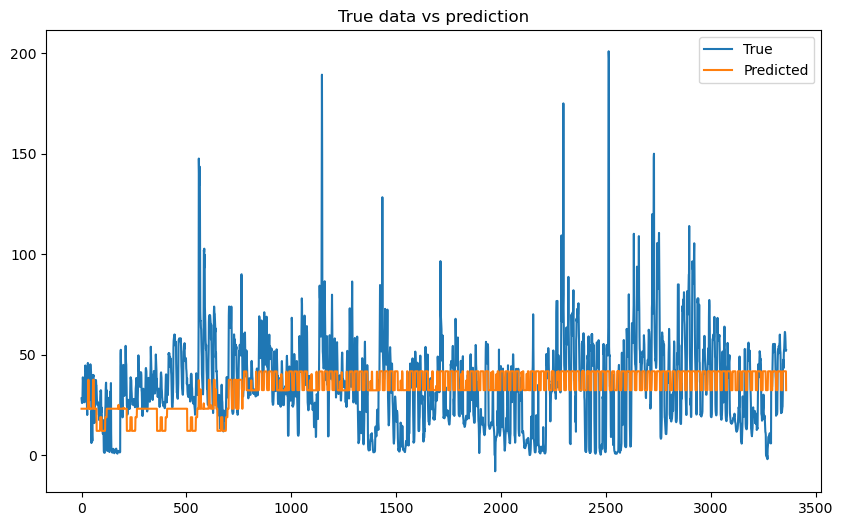

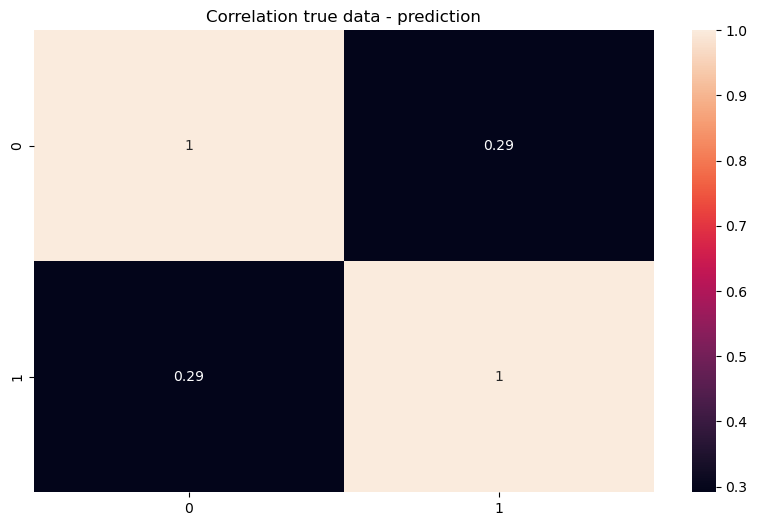

	r^2=0.075629
Mean Absolute Error (MAE): 16.32101884323502
Mean Squared Error (MSE): 444.8378570891895
Root Mean Squared Error (RMSE): 21.0911796040238
Mean Absolute Percentage Error (MAPE): 252.37
Accuracy: -152.37
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


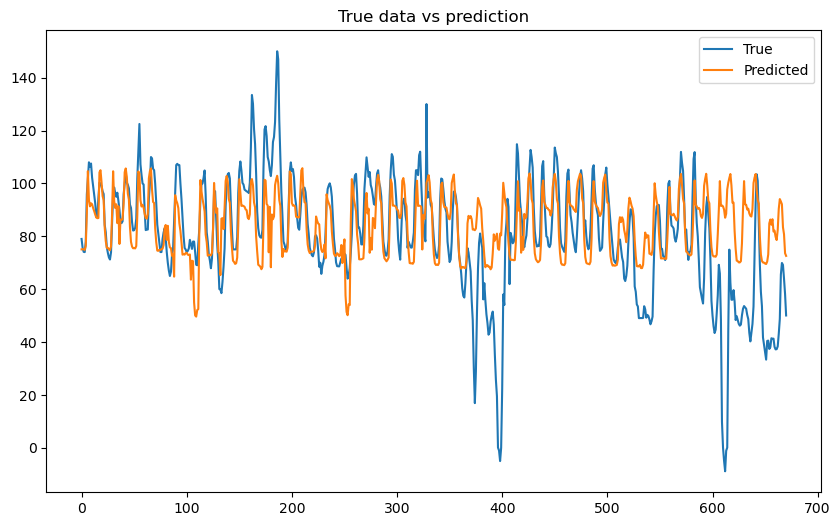

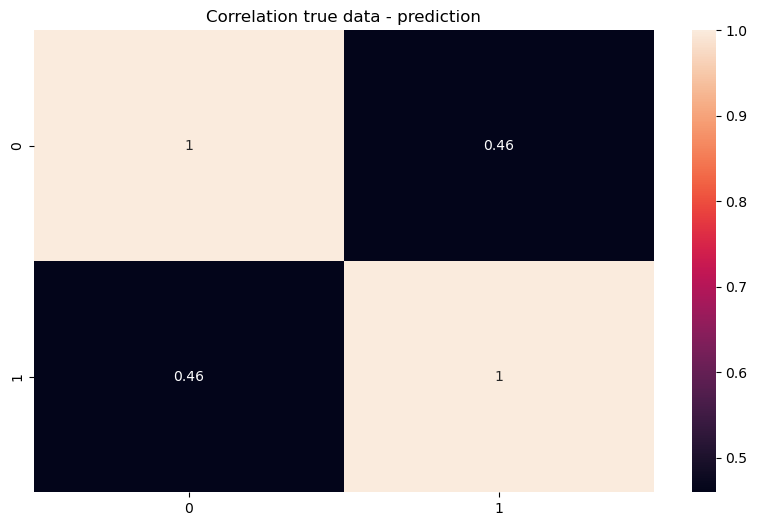

	r^2=0.179524
Mean Absolute Error (MAE): 13.663670794710821
Mean Squared Error (MSE): 403.23179094428883
Root Mean Squared Error (RMSE): 20.0806322346755
Mean Absolute Percentage Error (MAPE): 1717.01
Accuracy: -1617.01
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


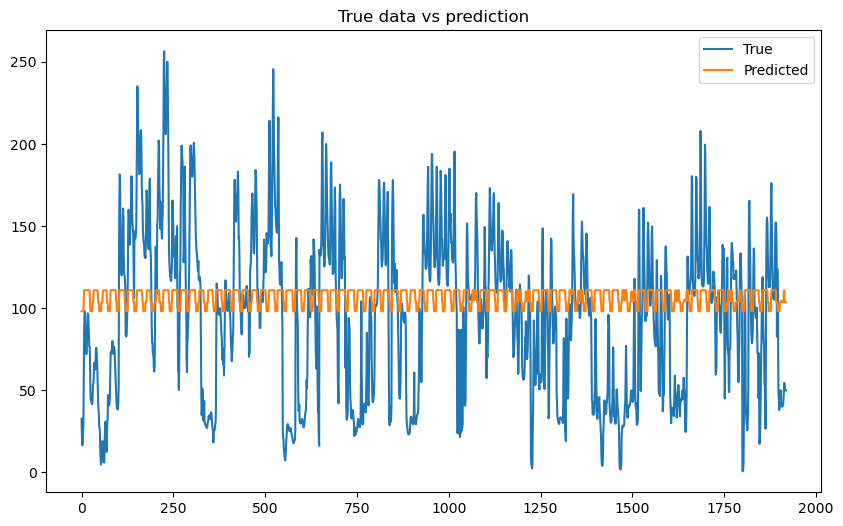

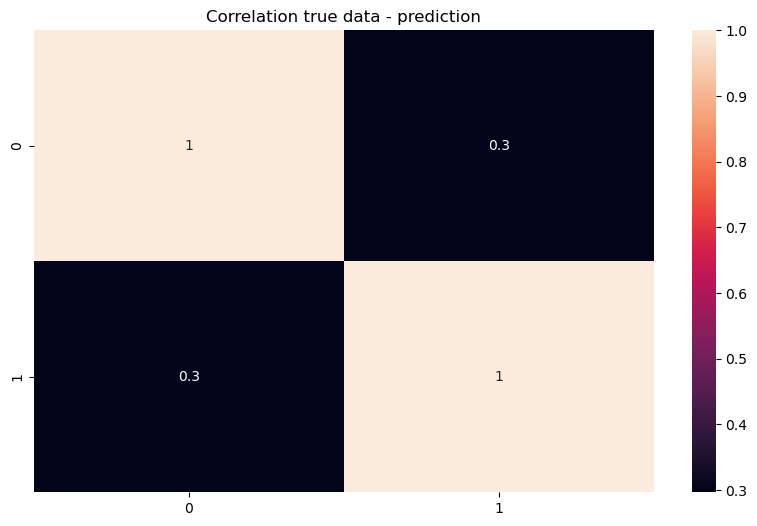

	r^2=0.006834
Mean Absolute Error (MAE): 40.68719364026369
Mean Squared Error (MSE): 2438.706391733783
Root Mean Squared Error (RMSE): 49.38326023799748
Mean Absolute Percentage Error (MAPE): 120.75
Accuracy: -20.75


In [28]:
rf_pred_0, rf_models_0 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### Gradient boost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


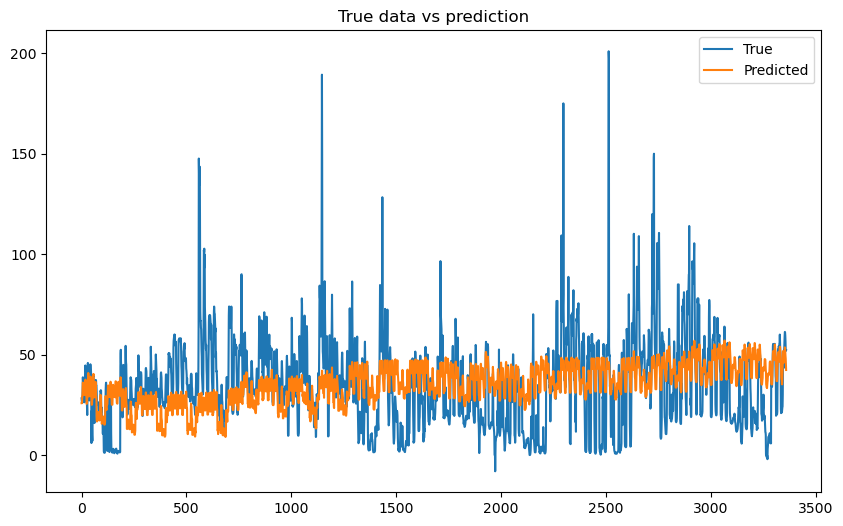

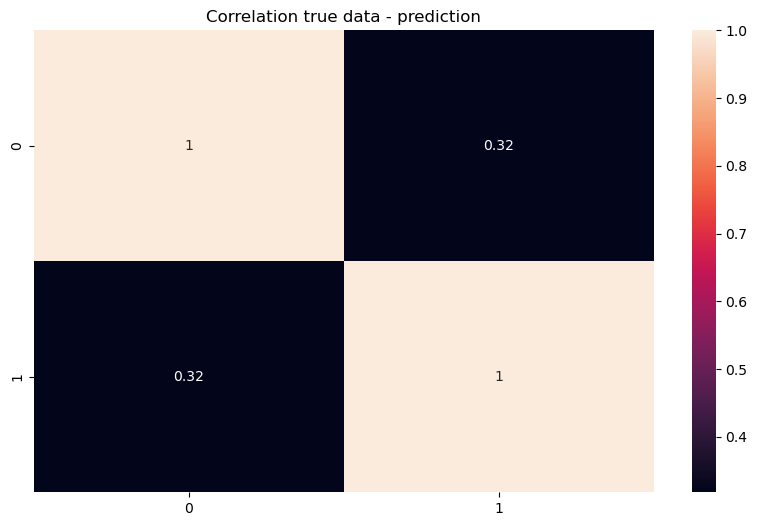

	r^2=0.086559
Mean Absolute Error (MAE): 16.137375657590862
Mean Squared Error (MSE): 439.57754780619814
Root Mean Squared Error (RMSE): 20.966104736125835
Mean Absolute Percentage Error (MAPE): 248.73
Accuracy: -148.73
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


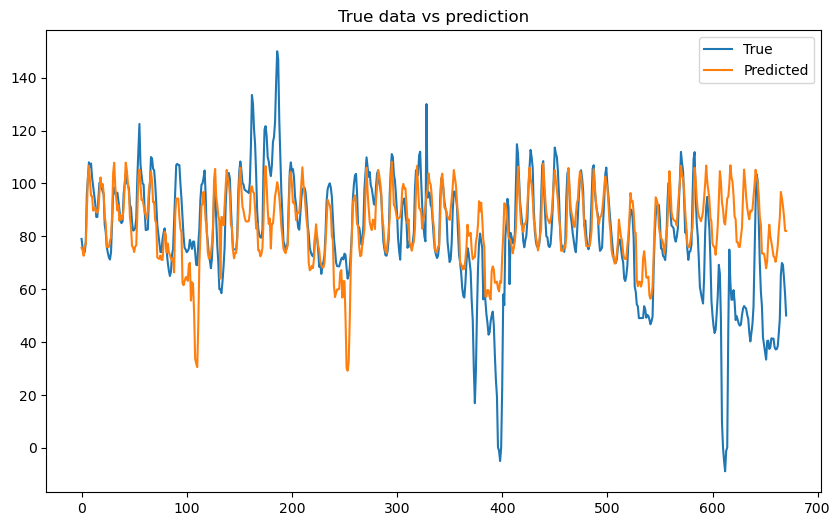

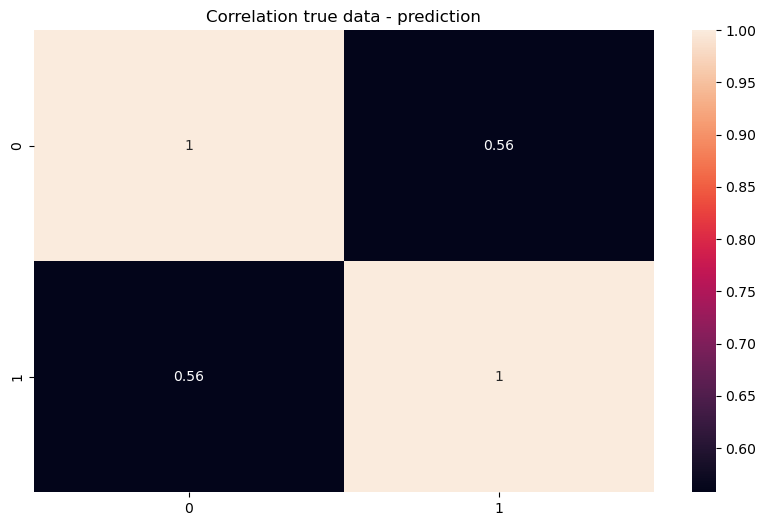

	r^2=0.280041
Mean Absolute Error (MAE): 12.326243739311831
Mean Squared Error (MSE): 353.8313803036817
Root Mean Squared Error (RMSE): 18.81040617061954
Mean Absolute Percentage Error (MAPE): 1414.23
Accuracy: -1314.23
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


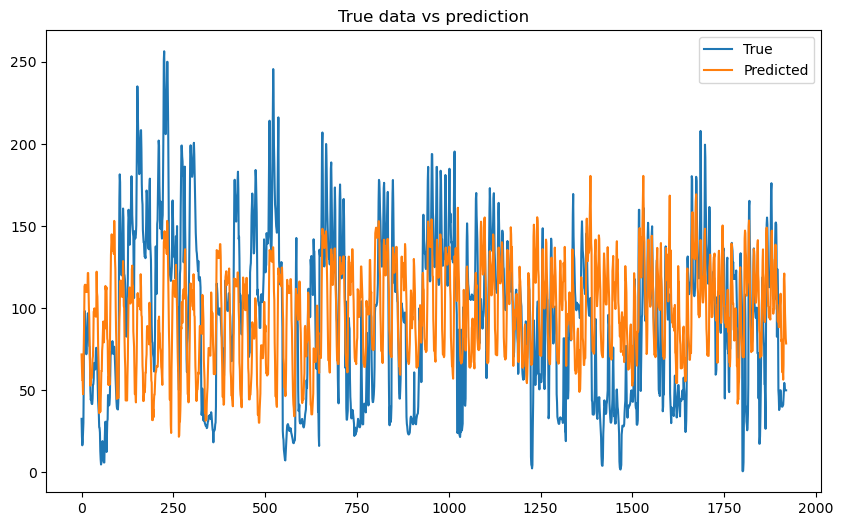

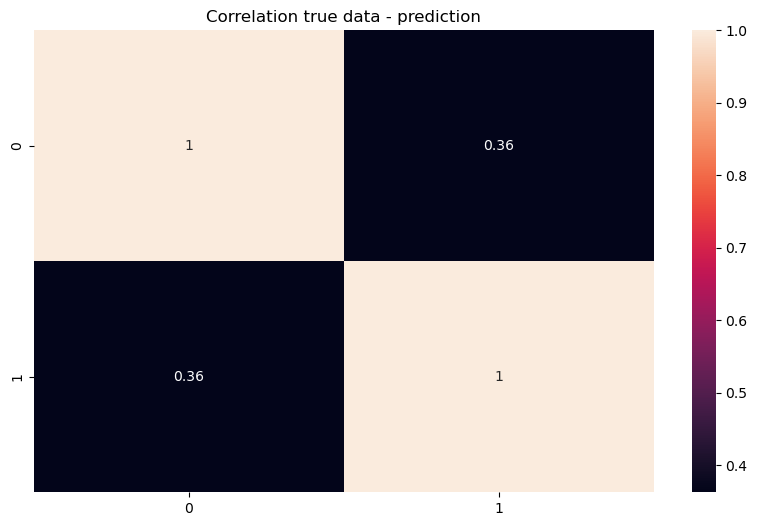

	r^2=0.080274
Mean Absolute Error (MAE): 39.277254642742626
Mean Squared Error (MSE): 2258.375347257653
Root Mean Squared Error (RMSE): 47.52236681035208
Mean Absolute Percentage Error (MAPE): 94.45
Accuracy: 5.55


In [48]:
gb_pred_0, gb_models_0 = run_model('gb', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


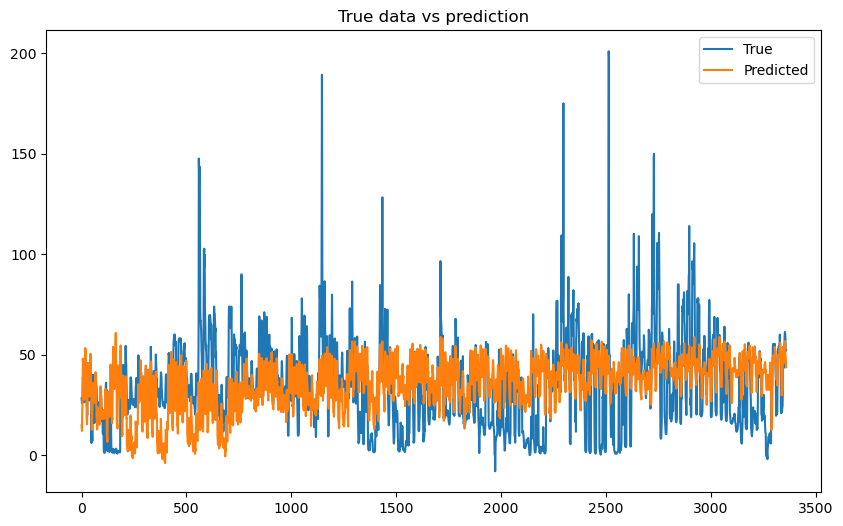

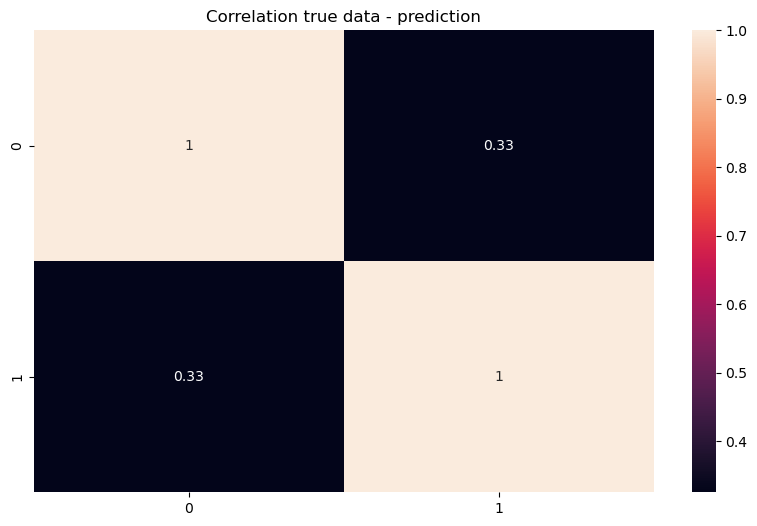

	r^2=0.056343
Mean Absolute Error (MAE): 16.272632933920338
Mean Squared Error (MSE): 454.1185429038454
Root Mean Squared Error (RMSE): 21.31005731817363
Mean Absolute Percentage Error (MAPE): 247.76
Accuracy: -147.76
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


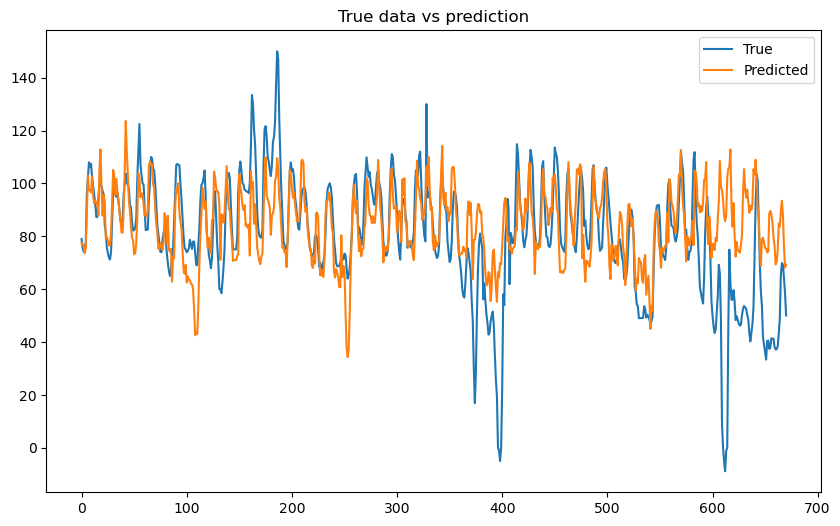

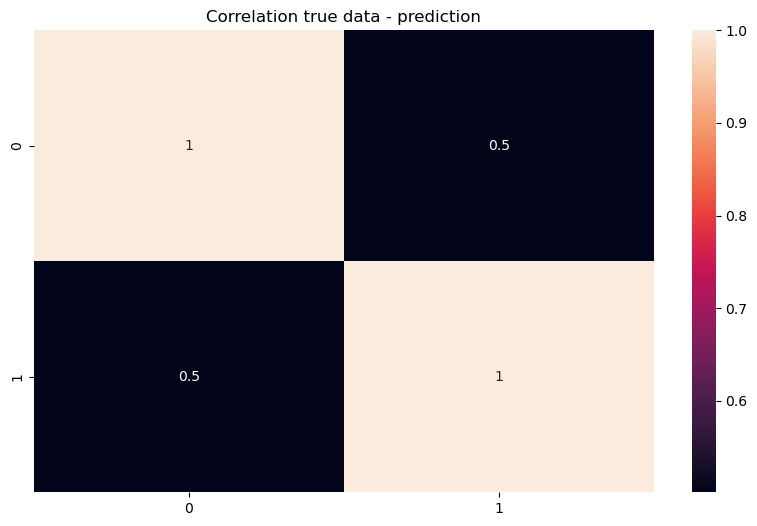

	r^2=0.208600
Mean Absolute Error (MAE): 13.35312376178679
Mean Squared Error (MSE): 388.94187441245924
Root Mean Squared Error (RMSE): 19.721609326129023
Mean Absolute Percentage Error (MAPE): 1550.2
Accuracy: -1450.2
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


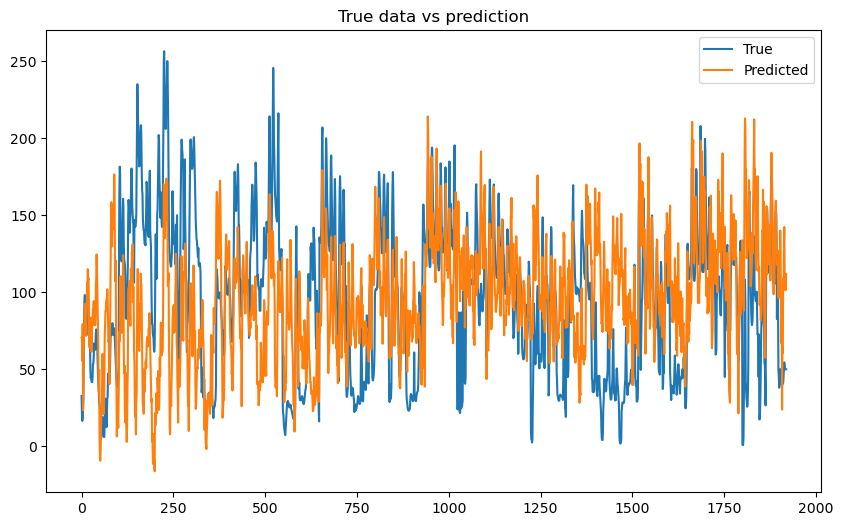

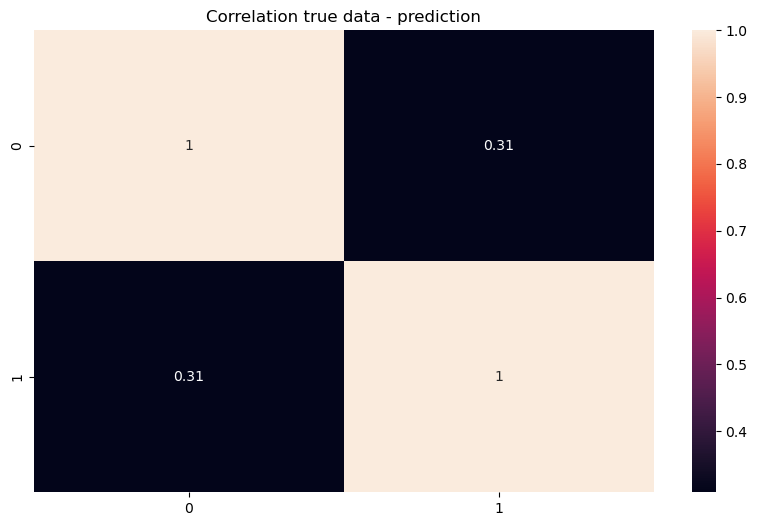

	r^2=-0.112294
Mean Absolute Error (MAE): 42.568918977372356
Mean Squared Error (MSE): 2731.224474985494
Root Mean Squared Error (RMSE): 52.26111819494005
Mean Absolute Percentage Error (MAPE): 106.63
Accuracy: -6.63


In [30]:
xgb_pred_0, xgb_models_0 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,'long term')

## Split - Method = 1
The approach is to split the data in increasing blocks. The size of the train set increases, whereas the size of the test remains 3 months.

In [7]:
split_method = 1

### Baseline

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


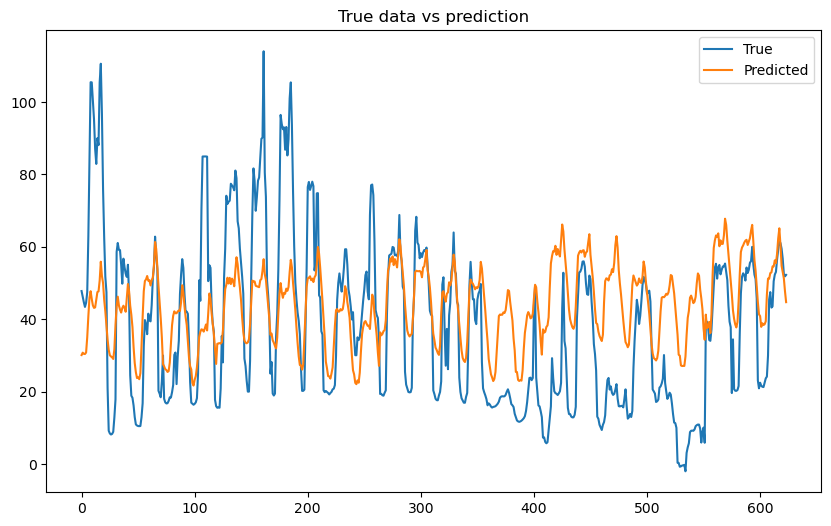

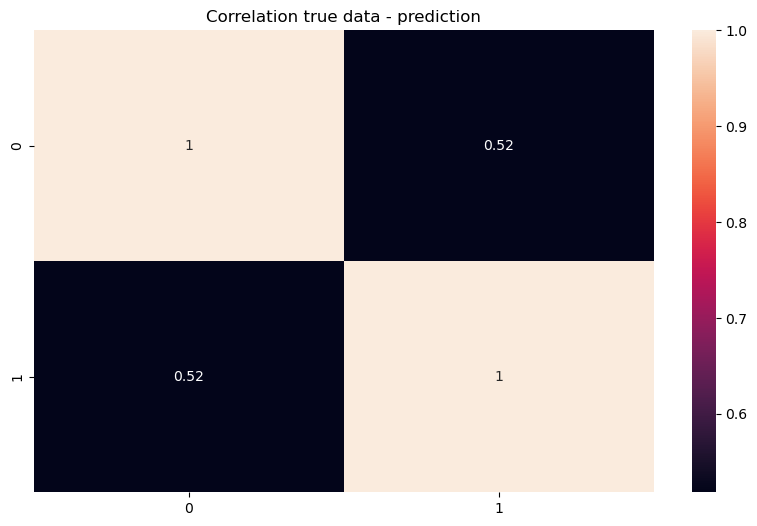

	r^2=0.205084
Mean Absolute Error (MAE): 16.522411908449023
Mean Squared Error (MSE): 422.92900973324157
Root Mean Squared Error (RMSE): 20.565237896344442
Mean Absolute Percentage Error (MAPE): 169.14
Accuracy: -69.14
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


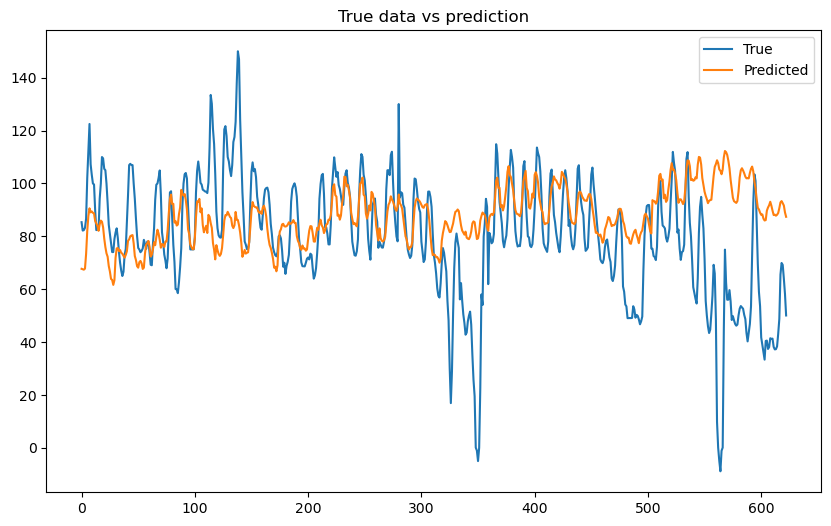

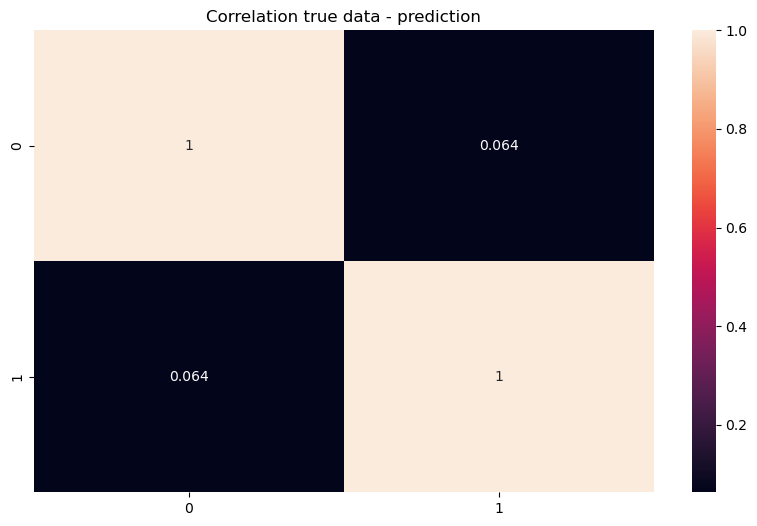

	r^2=-0.258808
Mean Absolute Error (MAE): 17.860673859093783
Mean Squared Error (MSE): 644.2733288432337
Root Mean Squared Error (RMSE): 25.382539842246555
Mean Absolute Percentage Error (MAPE): 1938.08
Accuracy: -1838.08
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


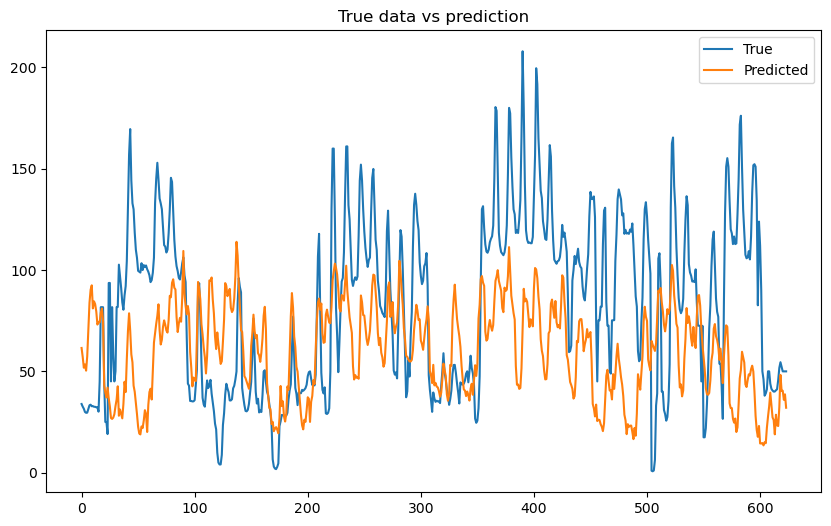

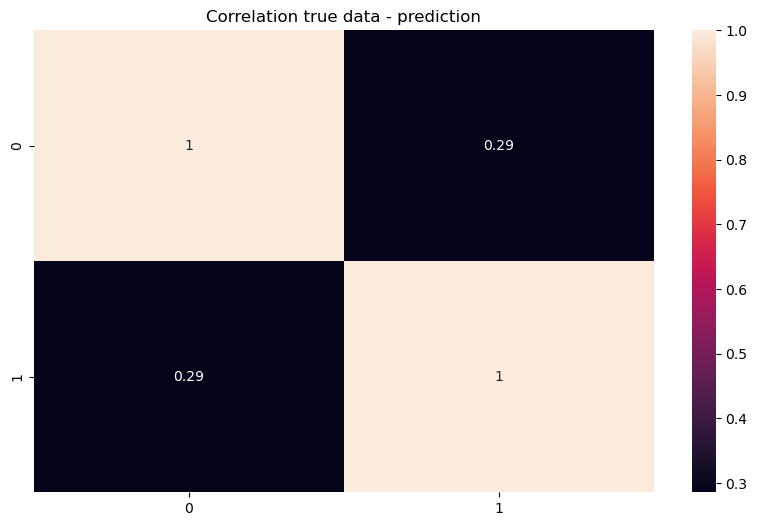

	r^2=-0.266680
Mean Absolute Error (MAE): 39.057291625814564
Mean Squared Error (MSE): 2263.051470066193
Root Mean Squared Error (RMSE): 47.57154054753948
Mean Absolute Percentage Error (MAPE): 96.83
Accuracy: 3.17


In [32]:
lr_pred_1, lr_model_1 = run_model('lr', df_lagged, k_folds, split_method,
                                         train_start, features, target, cols_std)

### Random forest

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


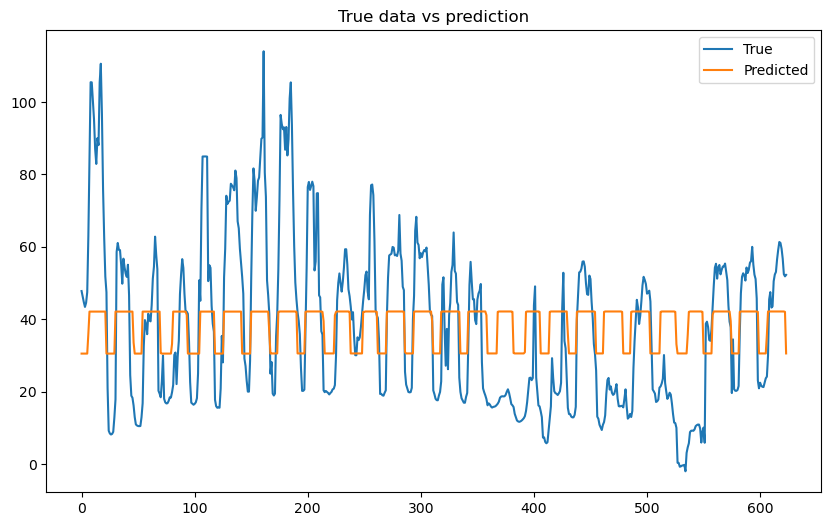

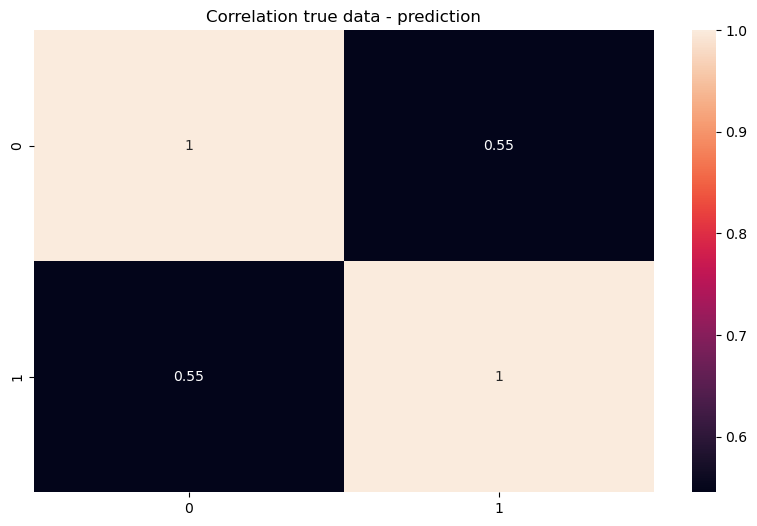

	r^2=0.202312
Mean Absolute Error (MAE): 16.78817244571623
Mean Squared Error (MSE): 424.403560311406
Root Mean Squared Error (RMSE): 20.601057261980657
Mean Absolute Percentage Error (MAPE): 168.02
Accuracy: -68.02
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


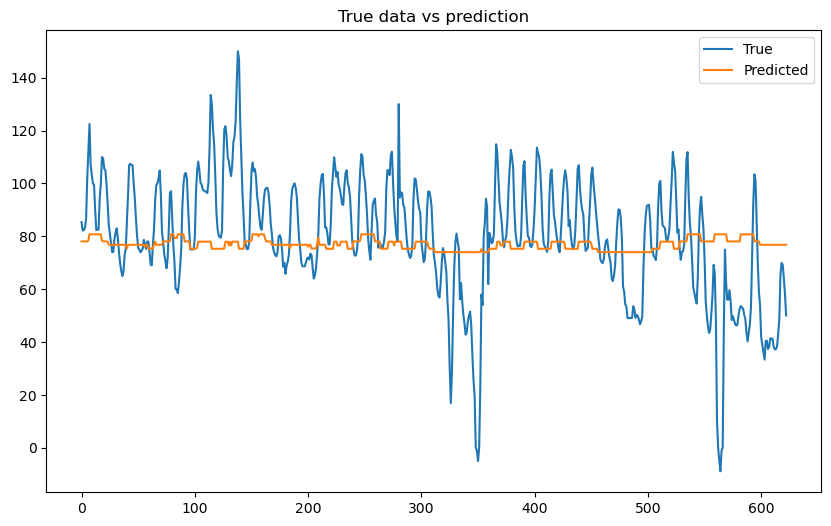

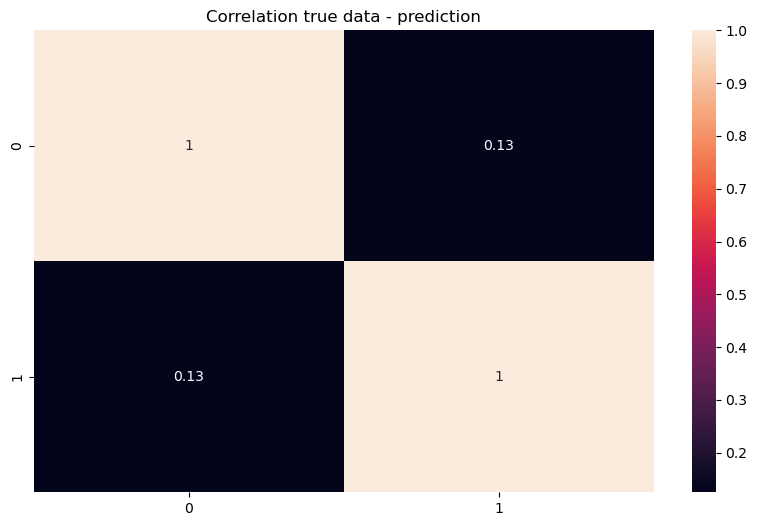

	r^2=0.000144
Mean Absolute Error (MAE): 16.93197635633668
Mean Squared Error (MSE): 511.7384274829417
Root Mean Squared Error (RMSE): 22.62163626891171
Mean Absolute Percentage Error (MAPE): 1689.82
Accuracy: -1589.82
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


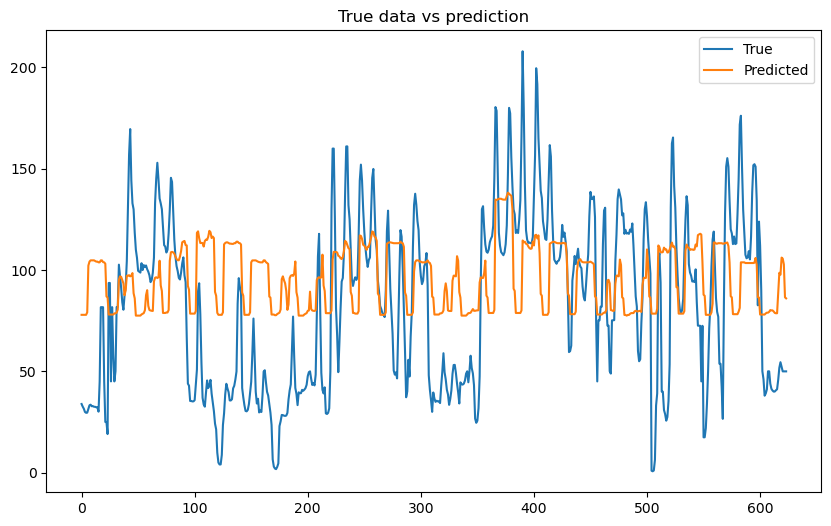

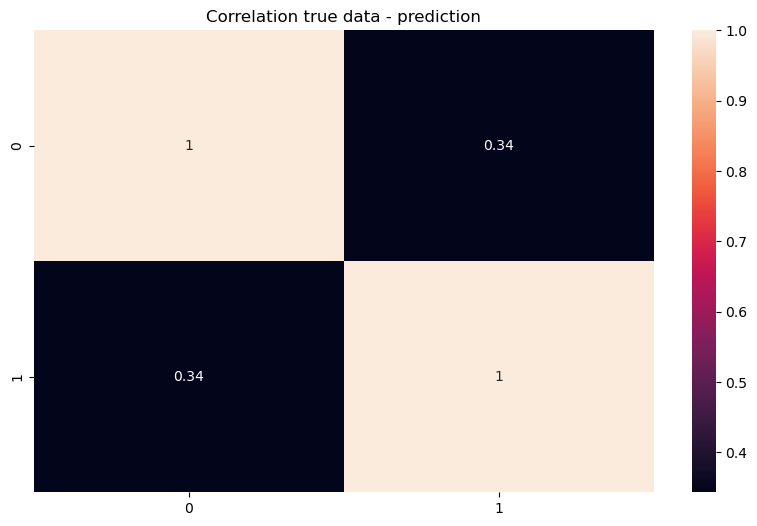

	r^2=0.025053
Mean Absolute Error (MAE): 35.18630438710094
Mean Squared Error (MSE): 1741.8410364628503
Root Mean Squared Error (RMSE): 41.735369130545024
Mean Absolute Percentage Error (MAPE): 143.71
Accuracy: -43.71


In [33]:
rf_pred_1, rf_models_1 = run_model('rf', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

### Gradient Boost

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00


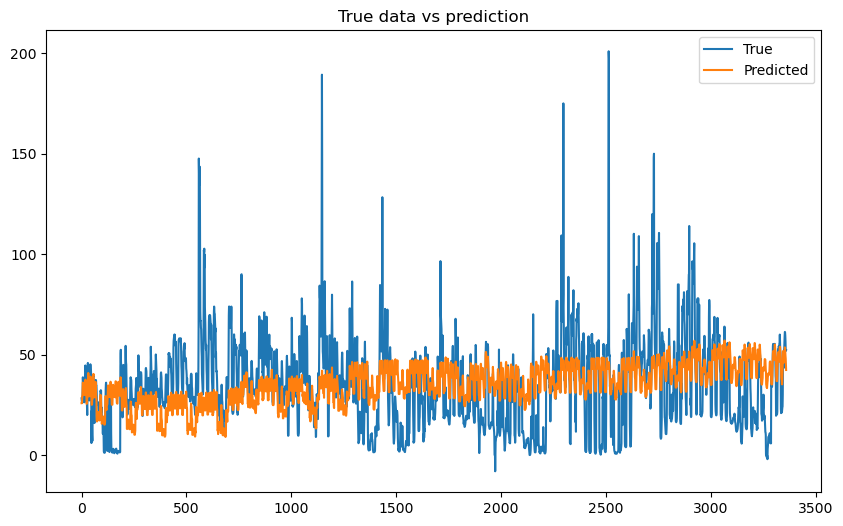

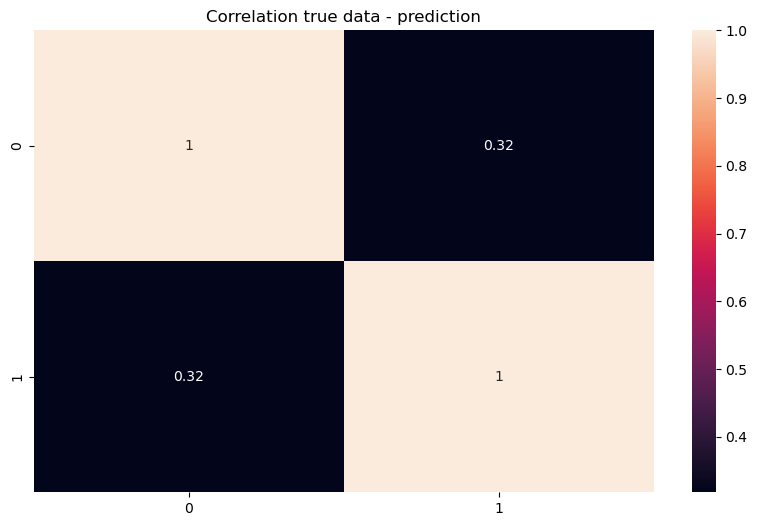

	r^2=0.086559
Mean Absolute Error (MAE): 16.137375657590862
Mean Squared Error (MSE): 439.57754780619814
Root Mean Squared Error (RMSE): 20.966104736125835
Mean Absolute Percentage Error (MAPE): 248.73
Accuracy: -148.73
Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00


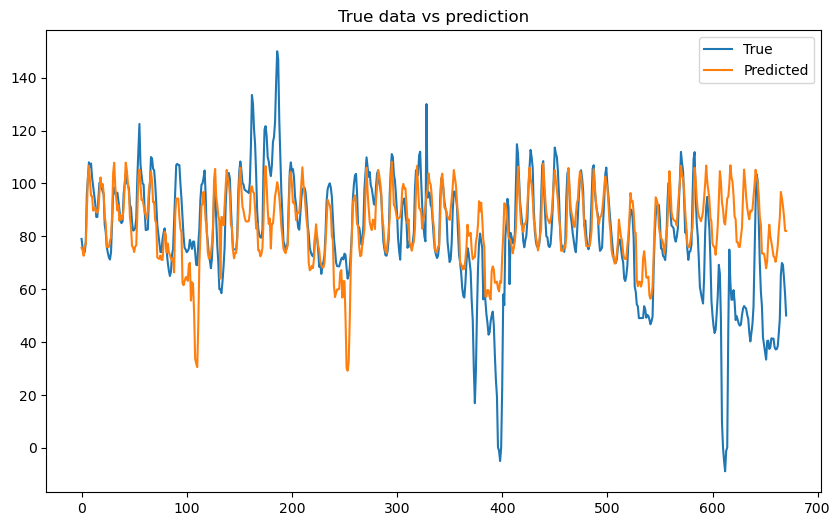

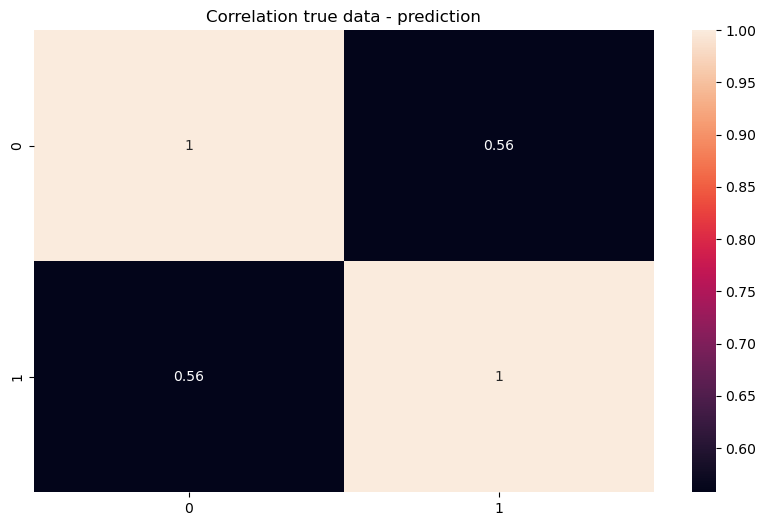

	r^2=0.280041
Mean Absolute Error (MAE): 12.326243739311831
Mean Squared Error (MSE): 353.8313803036817
Root Mean Squared Error (RMSE): 18.81040617061954
Mean Absolute Percentage Error (MAPE): 1414.23
Accuracy: -1314.23
Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00


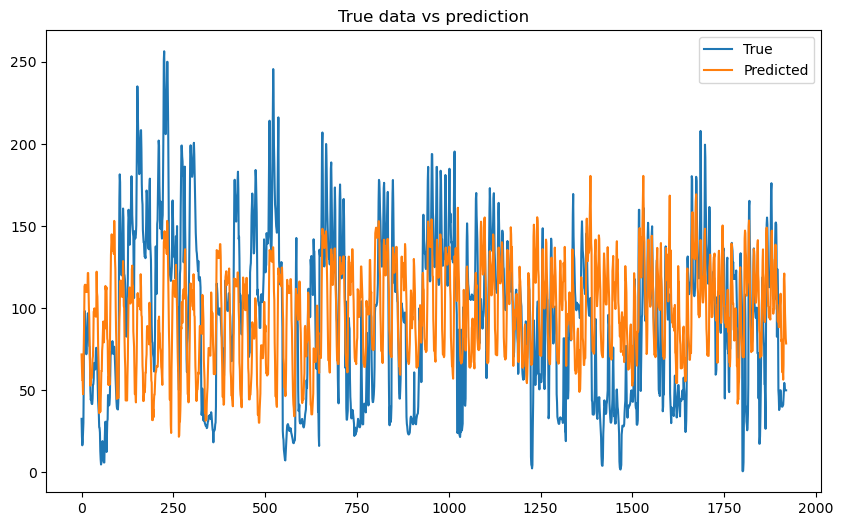

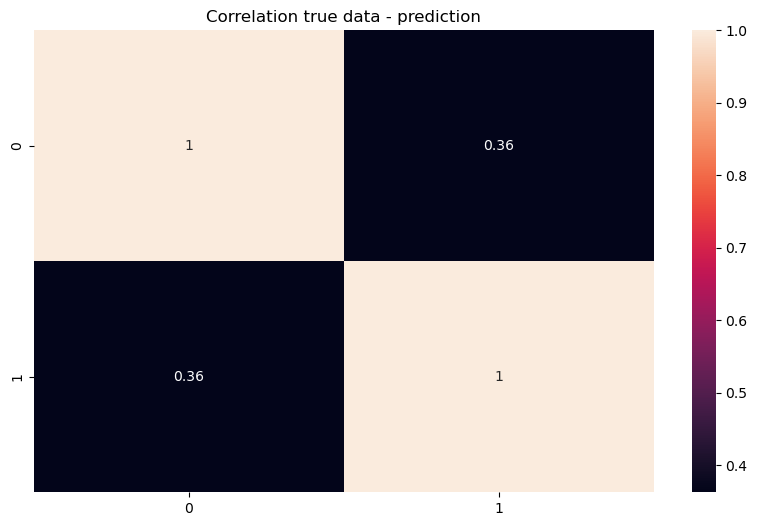

	r^2=0.080274
Mean Absolute Error (MAE): 39.277254642742626
Mean Squared Error (MSE): 2258.375347257653
Root Mean Squared Error (RMSE): 47.52236681035208
Mean Absolute Percentage Error (MAPE): 94.45
Accuracy: 5.55


In [49]:
gb_pred_1, gb_models_1 = run_model('gb', df_lagged, k_folds, split_method, train_start, features, target, cols_std)

### XGBoost

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00


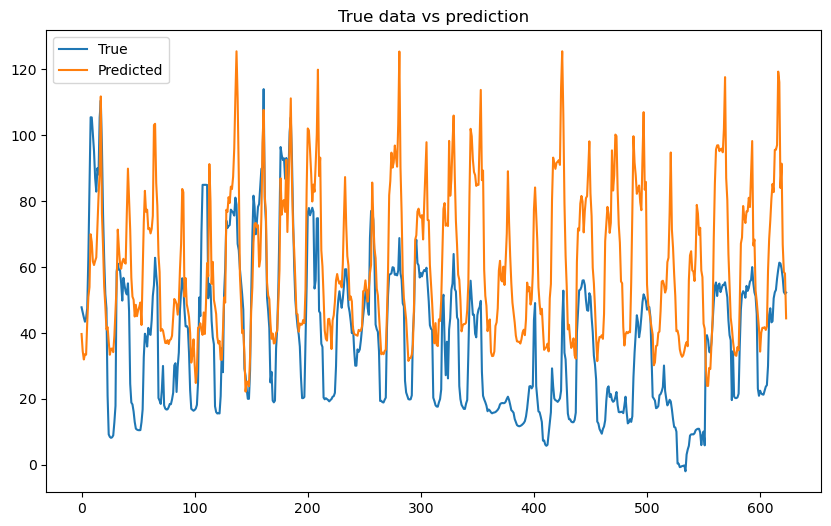

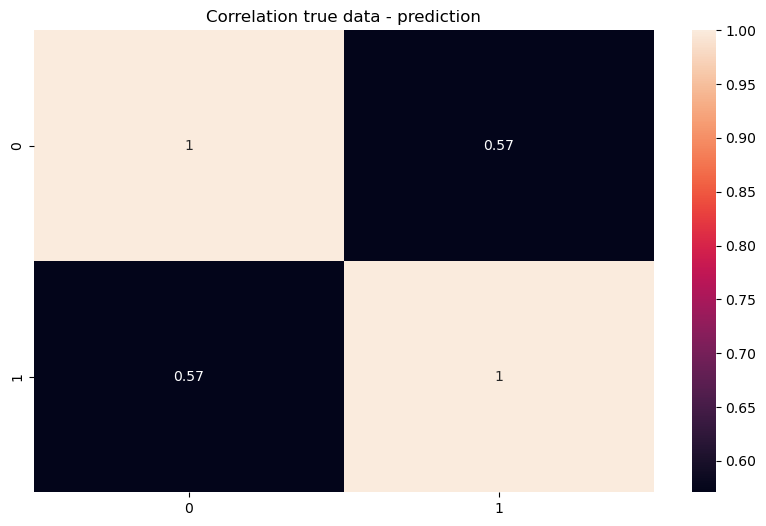

	r^2=-0.779168
Mean Absolute Error (MAE): 25.72464485474122
Mean Squared Error (MSE): 946.5924359395527
Root Mean Squared Error (RMSE): 30.76674236801083
Mean Absolute Percentage Error (MAPE): 229.99
Accuracy: -129.99
Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00


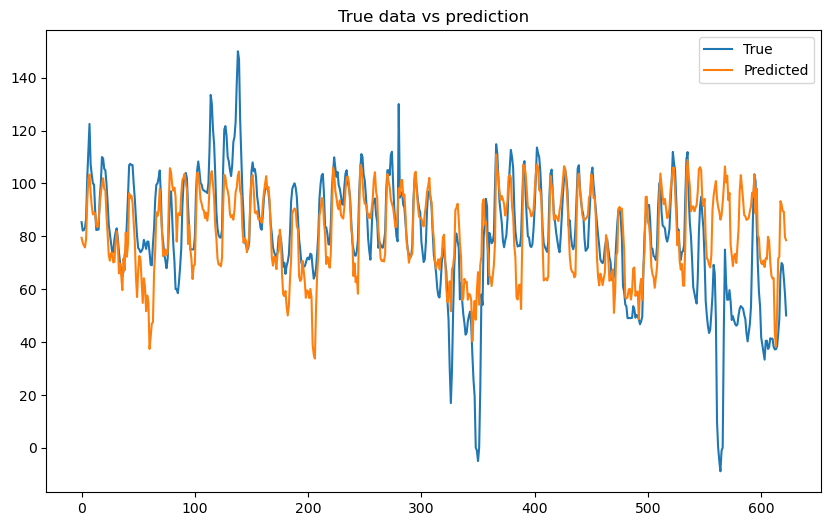

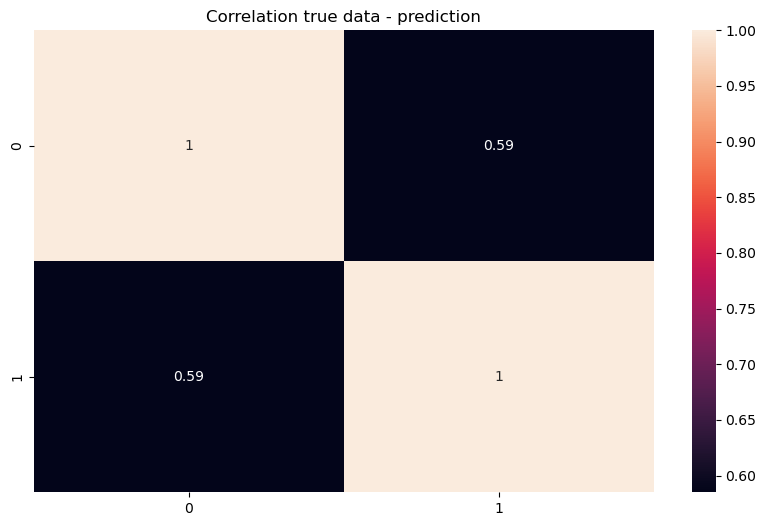

	r^2=0.323039
Mean Absolute Error (MAE): 12.927689907998564
Mean Squared Error (MSE): 346.4770121309075
Root Mean Squared Error (RMSE): 18.613892986984414
Mean Absolute Percentage Error (MAPE): 1369.58
Accuracy: -1269.58
Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00


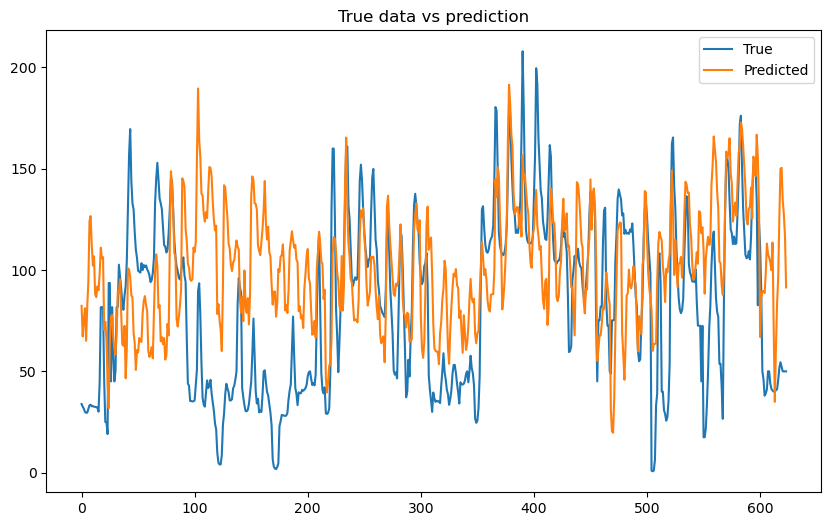

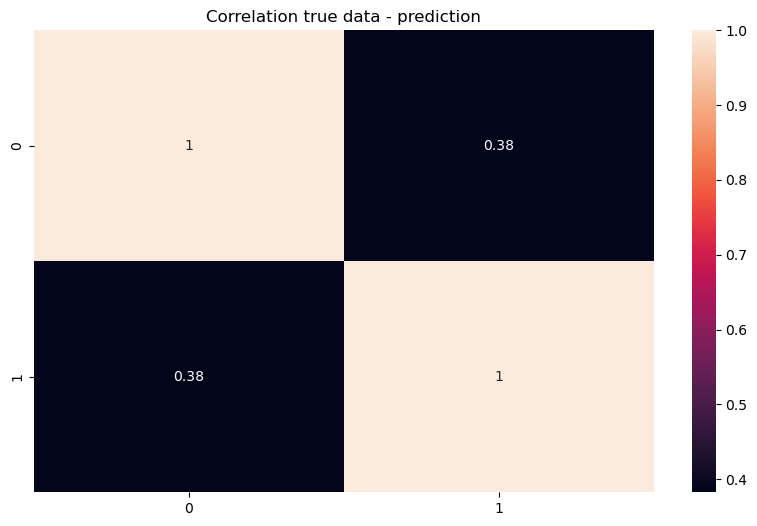

	r^2=-0.126985
Mean Absolute Error (MAE): 36.517580434725836
Mean Squared Error (MSE): 2013.4724907338182
Root Mean Squared Error (RMSE): 44.87173376117551
Mean Absolute Percentage Error (MAPE): 143.36
Accuracy: -43.36


In [34]:
xgb_pred_1, xgb_models_1 = run_model('xgb', df_lagged, k_folds, split_method, train_start, features, target, cols_std,X_std=False)

# Long term

## Feature selection for exogenous indicators

In [122]:
cols_std = ['DK_1_imports', 'SE_4_imports', 'DK_1_exports',
            'SE_4_exports', 'Forecasted_Load', 'Actual_Load',
             'ttf_price', 'coal_price', 'co2_price',
            'DE_LU_AT_imports', 'DE_LU_AT_exports', 'Wind Total'] 

features = cols_std + ['Quarter', 'Month', 'Year', 'Weekday', 'Hour', 'Week', 'business']

## ARIMA without exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-12-01 23:00:00, test 2020-12-02 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                25560
Model:                 ARIMA(8, 0, 1)   Log Likelihood              -81072.656
Date:                Tue, 25 Apr 2023   AIC                         162167.312
Time:                        20:23:48   BIC                         162256.948
Sample:                             0   HQIC                        162196.294
                              - 25560                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1610      1.563     24.412      0.000      35.097      41.225
ar.L1          2.1191 

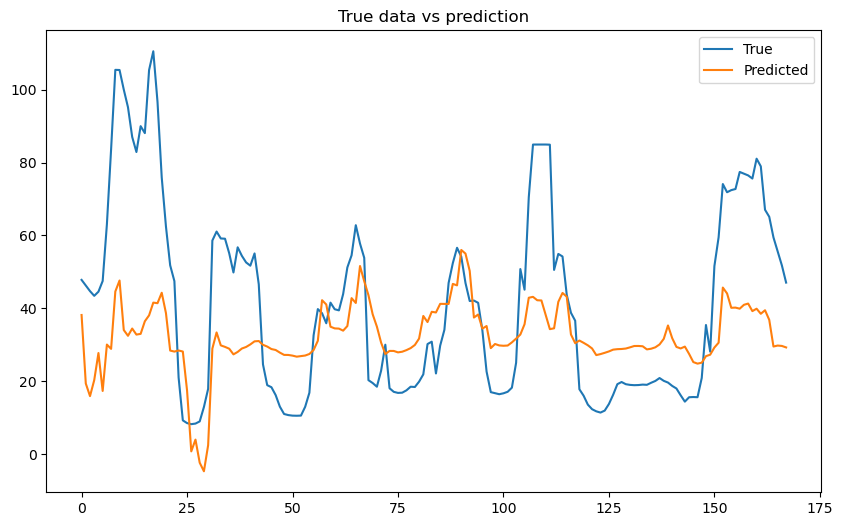

Iteration  1
train 2018-01-09 00:00:00 - 2021-07-01 23:00:00, test 2021-07-02 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30647
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -100206.805
Date:                Tue, 25 Apr 2023   AIC                         200435.610
Time:                        20:24:37   BIC                         200527.243
Sample:                             0   HQIC                        200464.982
                              - 30647                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.5622      1.654     24.525      0.000      37.321      43.804
ar.L1          2.1305 

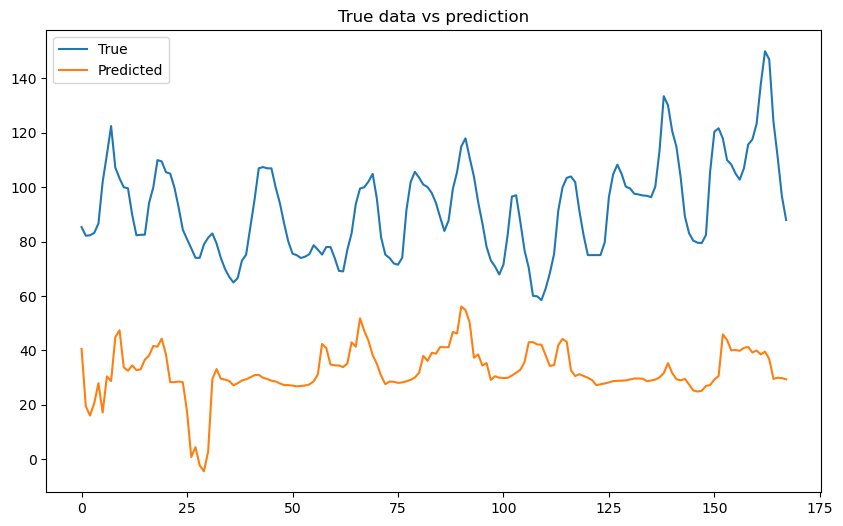

Iteration  2
train 2018-01-09 00:00:00 - 2023-03-16 23:00:00, test 2023-03-17 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                45598
Model:                 ARIMA(8, 0, 1)   Log Likelihood             -193512.785
Date:                Tue, 25 Apr 2023   AIC                         387047.569
Time:                        20:25:34   BIC                         387143.573
Sample:                             0   HQIC                        387077.771
                              - 45598                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.2198     10.638      7.823      0.000      62.370     104.070
ar.L1          1.7065 

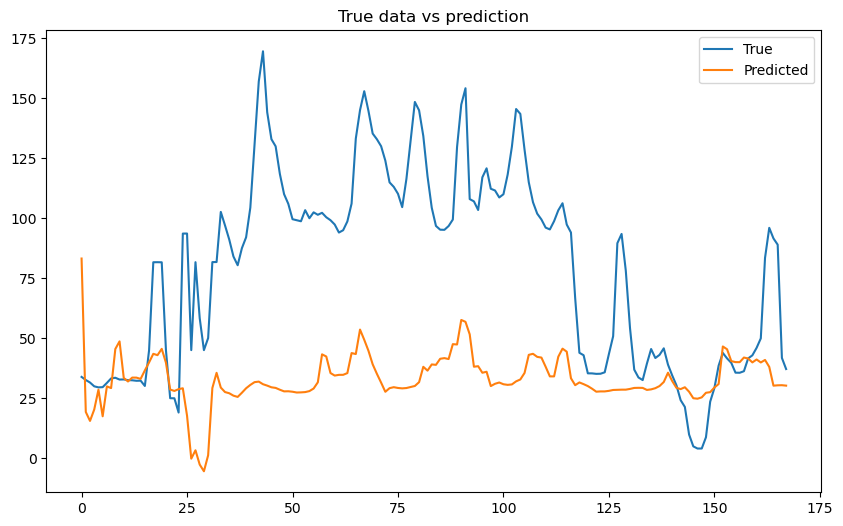

In [36]:
ypred, models=run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168,exog=None)

## ARIMA with exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                22367
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -64807.304
Date:                Tue, 25 Apr 2023   AIC                         129664.607
Time:                        21:20:23   BIC                         129864.991
Sample:                             0   HQIC                        129729.813
                              - 22367                                         
Covariance Type:                  opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -44.3548      3.797    -11.6

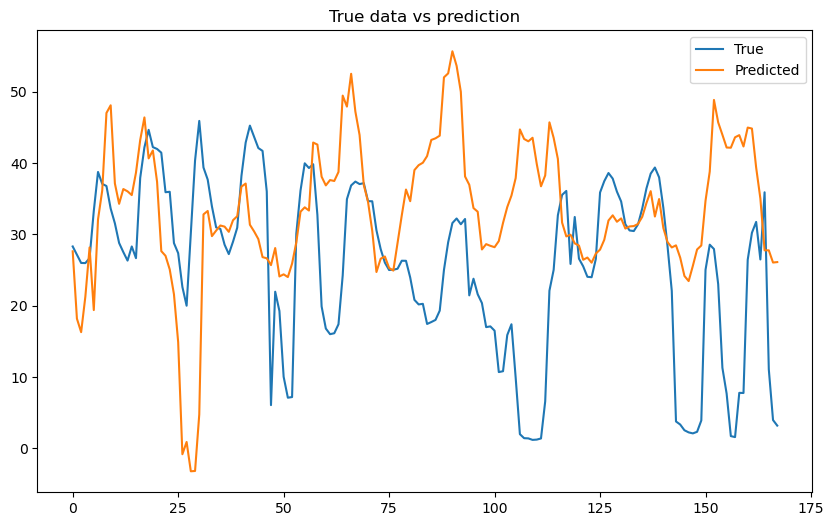

Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                30599
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -97207.809
Date:                Tue, 25 Apr 2023   AIC                         194465.618
Time:                        21:22:23   BIC                         194673.837
Sample:                             0   HQIC                        194532.365
                              - 30599                                         
Covariance Type:                  opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -33.4715      2.259    -14.8

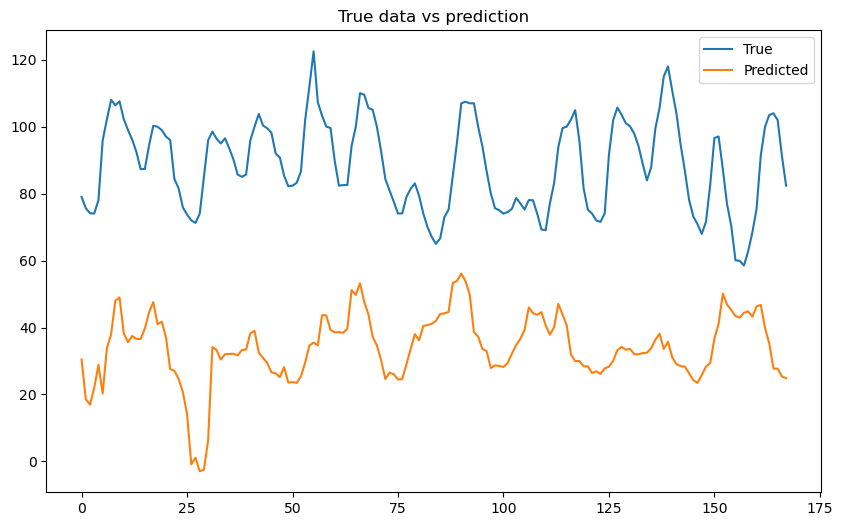

Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                44086
Model:                 ARIMA(8, 0, 0)   Log Likelihood             -185449.119
Date:                Tue, 25 Apr 2023   AIC                         370948.238
Time:                        21:25:19   BIC                         371165.585
Sample:                             0   HQIC                        371016.721
                              - 44086                                         
Covariance Type:                  opg                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -26.0236      7.515     -3.4

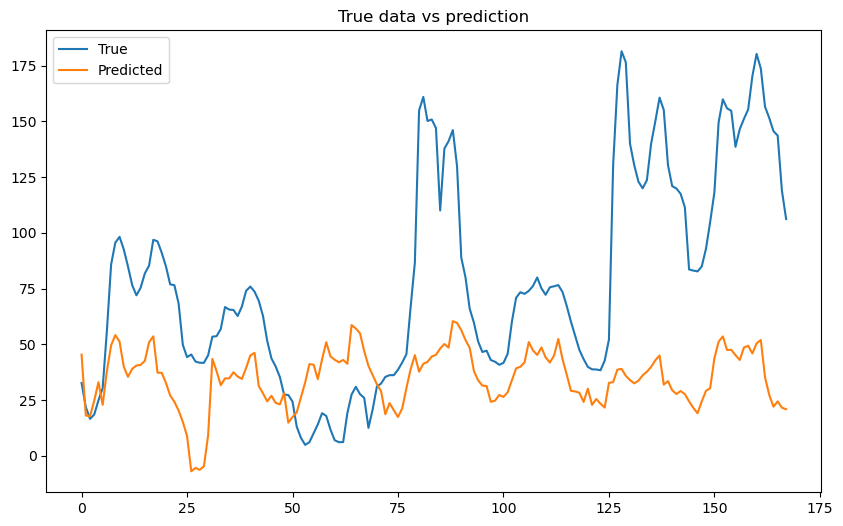

In [56]:

ypred, models=run_time_model('arima', df_clean, k_folds, split_method,train_start, features, target,168,exog=True)

## Ridge autoregressor without exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
0
0
RangeIndex(start=0, stop=3913, step=1)


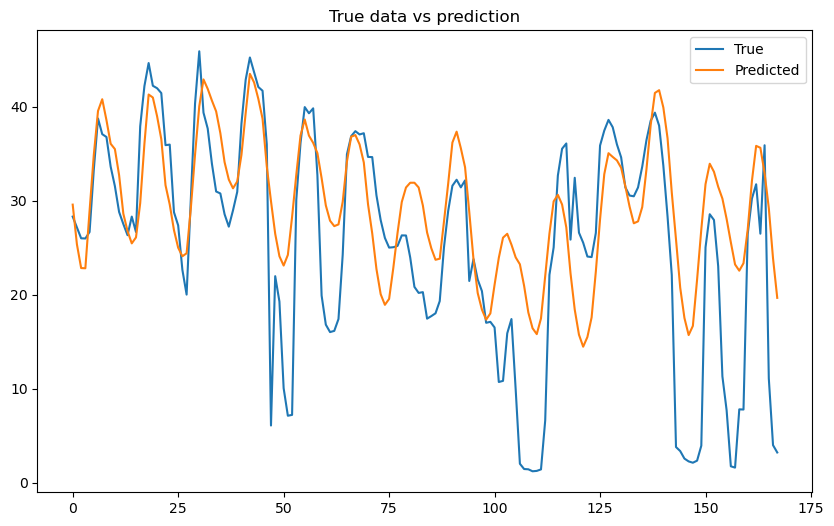

Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
0
0


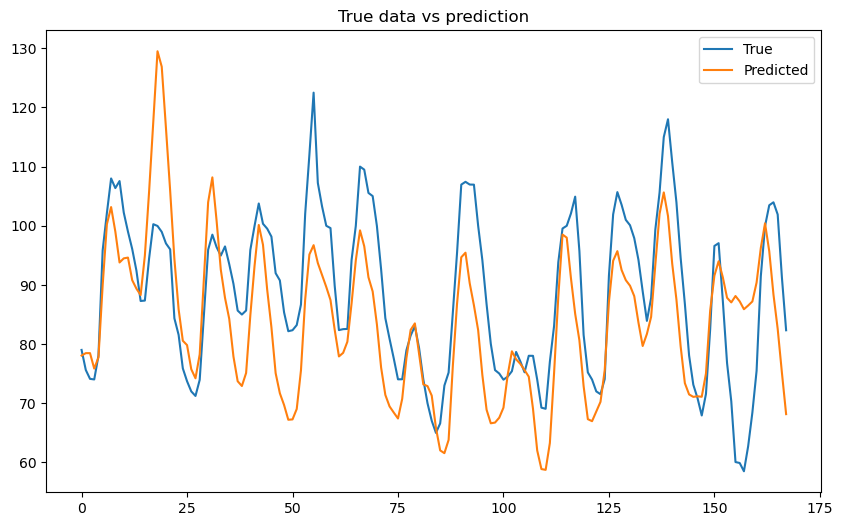

Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
0
0


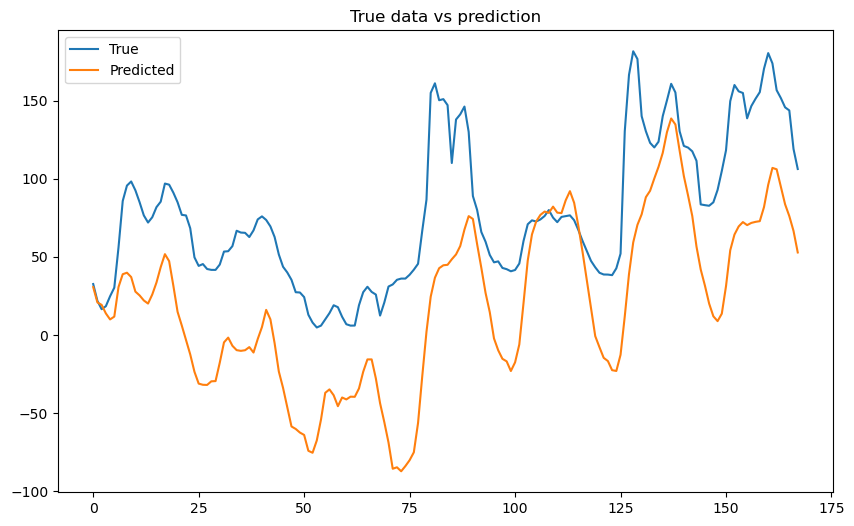

In [123]:
ypred, models=run_time_model('far', df_clean, k_folds, split_method,train_start, features, target,168,exog=None)

## Ridge autoregressor with exogenous factors

Iteration  0
train 2018-01-09 00:00:00 - 2020-07-21 23:00:00, test 2020-07-22 00:00:00 - 2020-12-31 23:00:00
0
0
RangeIndex(start=0, stop=3913, step=1)


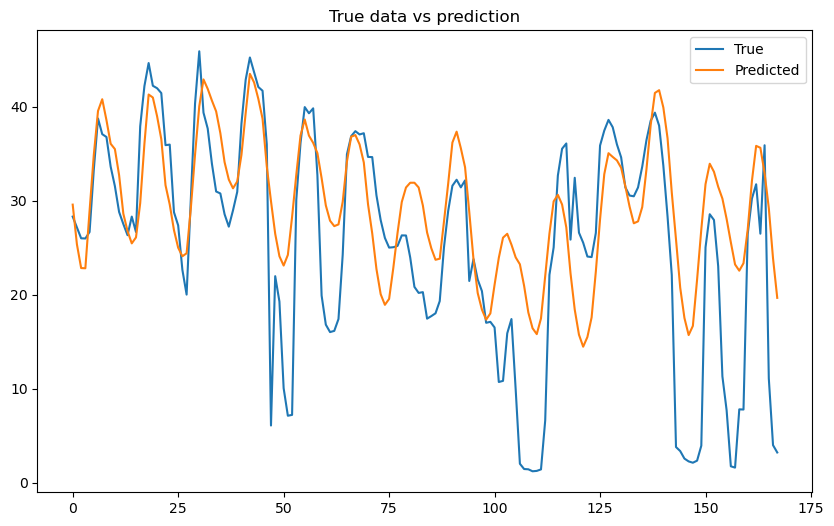

Iteration  1
train 2021-01-01 00:00:00 - 2021-06-29 23:00:00, test 2021-06-30 00:00:00 - 2021-07-31 23:00:00
0
0


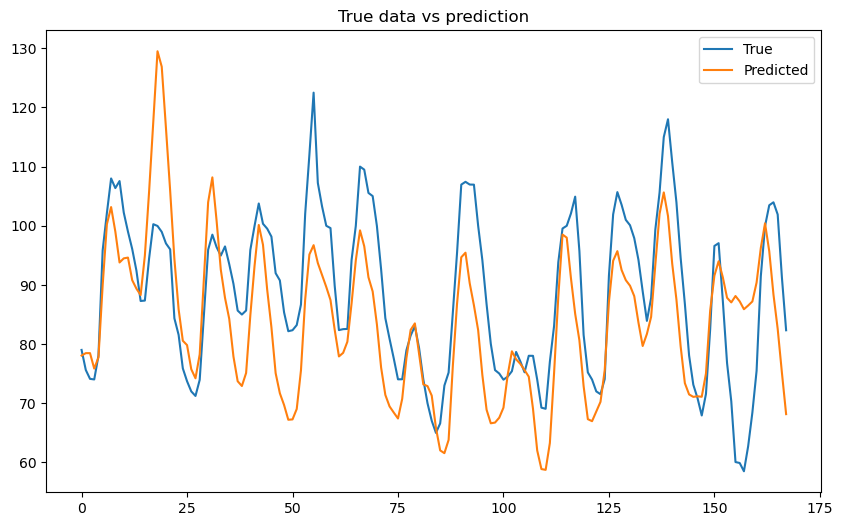

Iteration  2
train 2021-08-01 00:00:00 - 2023-01-12 23:00:00, test 2023-01-13 00:00:00 - 2023-04-15 23:00:00
0
0


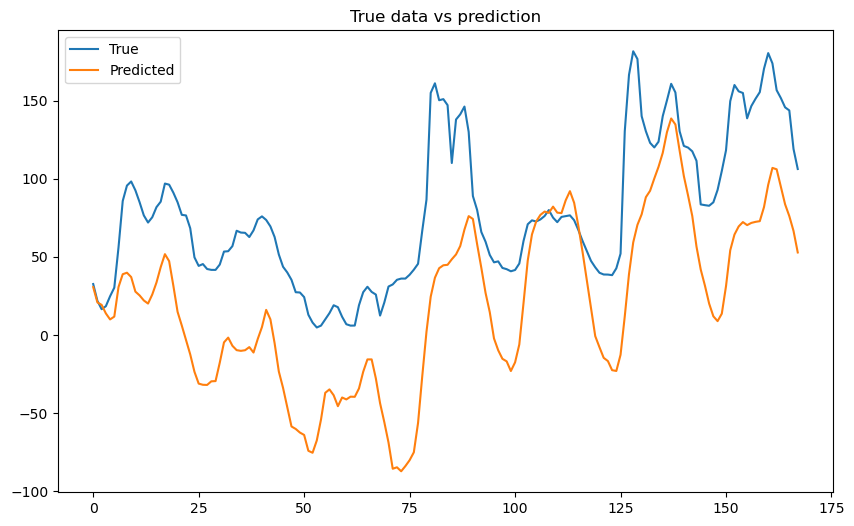

In [126]:
ypred, models=run_time_model('far', df_clean, k_folds, 0,train_start, features, target,168, exog = True)